# Hypothesis Testing with Insurance Data (Core)

Today, we will be analyzing data from us health insurance

- Use your hypothesis testing skills and the  ["Hypothesis Testing with Insurance Data"](https:https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset)

# Hypothesis Testing

In [52]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
#import scipy
#from sklearn.feature_selection import chi2

In [64]:
## load the kiva_loans.csv. display info and head
df = pd.read_csv('Data/insurance - insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
## Drop null values from related columns
df = df.dropna(subset=['charges','smoker'])

# Setting the id as the index

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Q1. Do smokers have higher insurance charges than non-smokers?

In [4]:
## check the col that contains the is a smoker 
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
## create a column that easily separates our groups
df['is_a_smoker'] = df['smoker'].str.contains('yes')
df['is_a_smoker'].value_counts()

False    1064
True      274
Name: is_a_smoker, dtype: int64

In [6]:
## save list of columns needed for each group
needed_cols = ['charges','is_a_smoker']
df[needed_cols]

,charges,is_a_smoker
0,16884.92400,True
1,1725.55230,False
2,4449.46200,False
3,21984.47061,False
4,3866.85520,False
...,...,...
1333,10600.54830,False
1334,2205.98080,False
1335,1629.83350,False
1336,2007.94500,False


In [7]:
## save male team in separate variable
smoker_df = df.loc[df['is_a_smoker']== False,needed_cols]
smoker_df

,charges,is_a_smoker
1,1725.55230,False
2,4449.46200,False
3,21984.47061,False
4,3866.85520,False
5,3756.62160,False
...,...,...
1332,11411.68500,False
1333,10600.54830,False
1334,2205.98080,False
1335,1629.83350,False


In [8]:
## save female team in separate variables
not_a_sm = df.loc[df['is_a_smoker']== True,needed_cols]
not_a_sm

,charges,is_a_smoker
0,16884.92400,True
11,27808.72510,True
14,39611.75770,True
19,36837.46700,True
23,37701.87680,True
...,...,...
1313,36397.57600,True
1314,18765.87545,True
1321,28101.33305,True
1323,43896.37630,True


In [9]:
## Make a df just for visualization by concat the groups 
plot_df =  pd.concat([smoker_df, not_a_sm])
plot_df

,charges,is_a_smoker
1,1725.55230,False
2,4449.46200,False
3,21984.47061,False
4,3866.85520,False
5,3756.62160,False
...,...,...
1313,36397.57600,True
1314,18765.87545,True
1321,28101.33305,True
1323,43896.37630,True


<AxesSubplot: xlabel='is_a_smoker', ylabel='charges'>

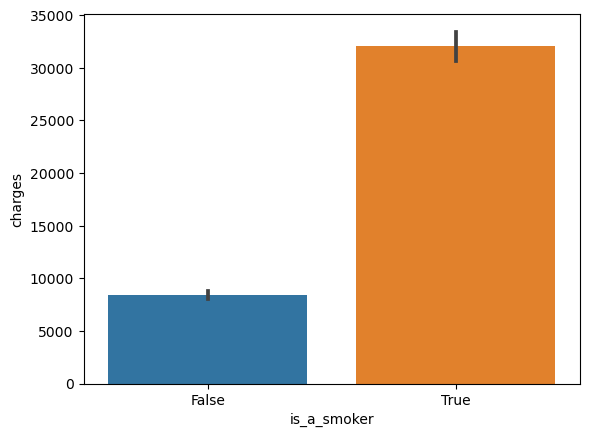

In [10]:
## visualize the group means
sns.barplot(data=plot_df,x= 'is_a_smoker', y= 'charges')

### Checking Assumption of No Sig. Outliers

In [11]:
## Saving JUST the numeric col as final group variables
smoker_group = smoker_df['charges']
non_sm_group = not_a_sm['charges']
smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [12]:
## Check smoker group for outliers
smoker_outliers = np.abs(stats.zscore(smoker_group))>3

## how many outliers?
smoker_outliers.value_counts()

False    1040
True       24
Name: charges, dtype: int64

In [13]:
## remove outliers from smoker_group
smoker_group = smoker_group[~smoker_outliers]

In [14]:
## Check non smoker_group for outliers
not_smoker_outliers = np.abs(stats.zscore(non_sm_group))>3

## how many outliers?
not_smoker_outliers.value_counts()

False    274
Name: charges, dtype: int64

In [15]:
## remove outliers from non smoker_group
non_sm_group = non_sm_group[~not_smoker_outliers]

### Test for Normality

In [16]:
## Check female group for normality
result = stats.normaltest(smoker_group)
result

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [17]:
if result.pvalue<0.05:
    print('reject the null hypothesis. ')
else:
    print ('we cannot reject the null hypothesis.  ')

reject the null hypothesis. 


In [18]:
## Check n for female group
len(smoker_group)
len(non_sm_group)

274

Test for Normality fale the test beacouse in is bigger than 15

### Test for Equal Variances

True

In [20]:
## Use an if-else to help interpret the p-value
if reslts.pvalue<0.05:
    print('the groupe DO NOT have equal variance')
else:
    print ('the groupe DO have equal variance')

the groupe DO NOT have equal variance


## Final Hypothesis T-Test

In [21]:
## run final hypothess test
result = stats.ttest_ind(smoker_group,non_sm_group,equal_var=False)
## is our result significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")

p-value=0.0000000000
Significant: True


In [22]:
smoker_group.mean()

7939.8608446721155

In [23]:
non_sm_group.mean()

32050.23183153284

Final Conclusion:

-p value < 0.05 for the teast so we reject the null hyposis and we suport the hyposis

-as we can say that at least smoker pay less insurance than male

## Q2. Are men more likely to smoke than women?

In [24]:
## check the col that contains the gender 
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [25]:
## create a column that easily separates our groups
df['female'] = df['sex'].str.contains('female')
df['female'].value_counts()

False    676
True     662
Name: female, dtype: int64

In [26]:
## save list of columns needed for each group
needed_cols = ['smoker','female']
df[needed_cols]

,smoker,female
0,yes,True
1,no,False
2,no,False
3,no,False
4,no,False
...,...,...
1333,no,False
1334,no,True
1335,no,True
1336,no,True


In [27]:
## save male team in separate variable
female_df = df.loc[df['female']== False,needed_cols]
female_df

,smoker,female
1,no,False
2,no,False
3,no,False
4,no,False
8,no,False
...,...,...
1324,no,False
1325,no,False
1327,no,False
1329,no,False


In [28]:
## save female team in separate variables
male_df = df.loc[df['female']== True,needed_cols]
male_df

,smoker,female
0,yes,True
5,no,True
6,no,True
7,no,True
9,no,True
...,...,...
1332,no,True
1334,no,True
1335,no,True
1336,no,True


In [29]:
## Make a df just for visualization by concat the groups 
plot_df =  pd.concat([male_df, female_df])
plot_df

,smoker,female
0,yes,True
5,no,True
6,no,True
7,no,True
9,no,True
...,...,...
1324,no,False
1325,no,False
1327,no,False
1329,no,False


<AxesSubplot: xlabel='smoker', ylabel='female'>

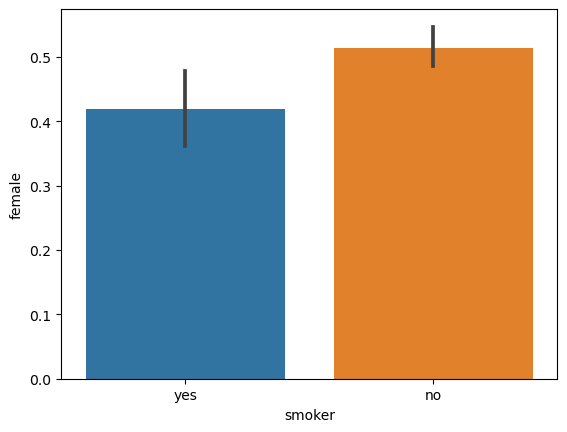

In [30]:
## visualize the group means
sns.barplot(data=plot_df,x= 'smoker', y= 'female')

## Chi-Square test

In [56]:
cros = pd.crosstab(df['female'],df['is_a_smoker'])

In [58]:
crit = stats.chi2_contingency(cros,correction=False, lambda_=None)
crit

(7.765921028604452,
 0.005324114164320537,
 1,
 array([[537.56651719, 138.43348281],
        [526.43348281, 135.56651719]]))

- Chi-square value(7.7659).
- p-value (0.0053).
- degrees of freedom (1).

In [ ]:
## Check female group for outliers
female_outliers = np.abs(stats.zscore(female_group))>3

## how many outliers?
female_outliers.value_counts()

##  Do different regions have different charges, on average?

In [59]:
## check the col that contains the is a smoker 
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [75]:
ave = df.groupby('region')['charges'].mean()
ave

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

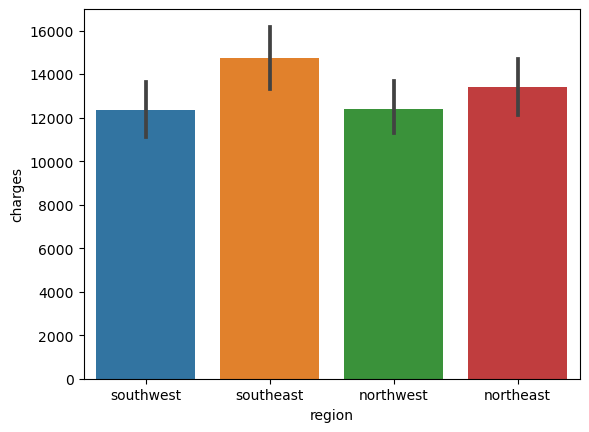

In [78]:
## visualize the group means
sns.barplot(data=df, x='region',y='charges');

## Separating Our Groups

In [79]:
## Create groups dictionary. There are only 4 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

## Testing Assumptions

In [80]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [81]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


#### We confirm that each group do not have a normal distribution.

## Testing Assumption of Equal Variance

In [83]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

#### We met the assumption of not an equal variance.

In [84]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

### Tukey's Pairwise Multiple Comparisons Test

In [86]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']

In [87]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


#### You can see in the summary above that there are 1 significant results.  
#### We see that there is a significant difference in charges between region southeast and all of the others. 